In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler
from general_dcr import dcr_stroke_healthcare

In [2]:
file_name = "stroke_healthcare_original_train.csv"
org_train_df = pd.read_csv(f"../data_split/original_train_dataset/{file_name}")

file_name = "stroke_healthcare_original_test.csv"
org_test_df = pd.read_csv(f"../data_split/original_test_dataset/{file_name}")


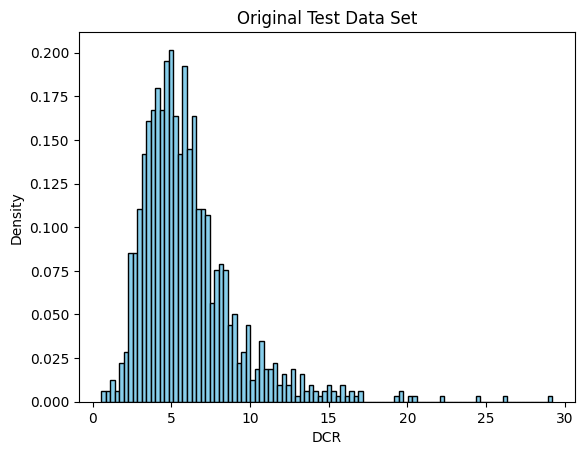

great_gpt2_12_layer_stroke_healthcare


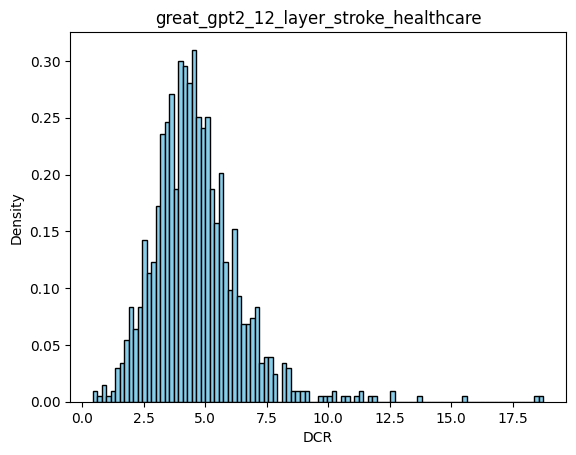

great_gpt2_6_layer_stroke_healthcare


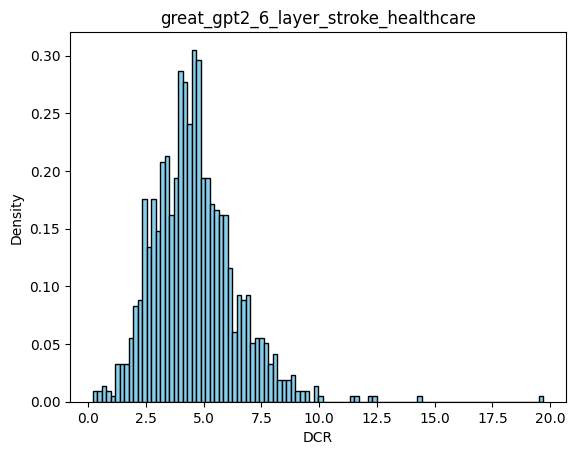

great_gpt_bigcode_12_layer_stroke_healthcare


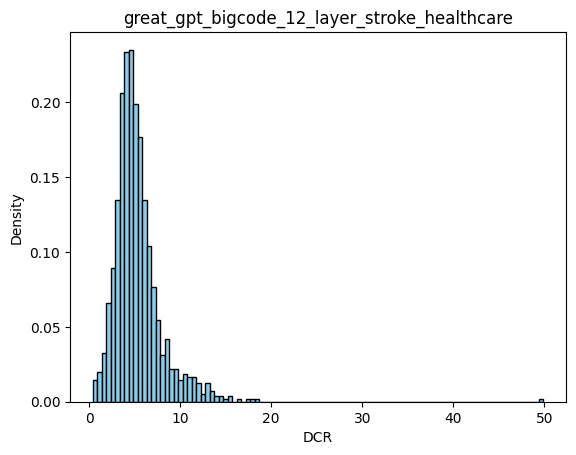

great_gpt_bigcode_6_layer_stroke_healthcare


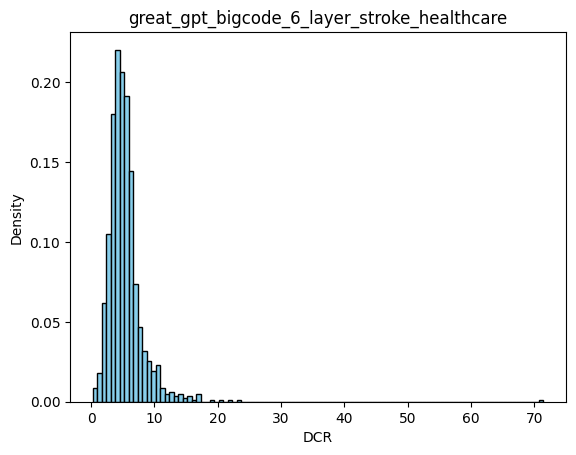

great_gpt_j_1_layer_stroke_healthcare


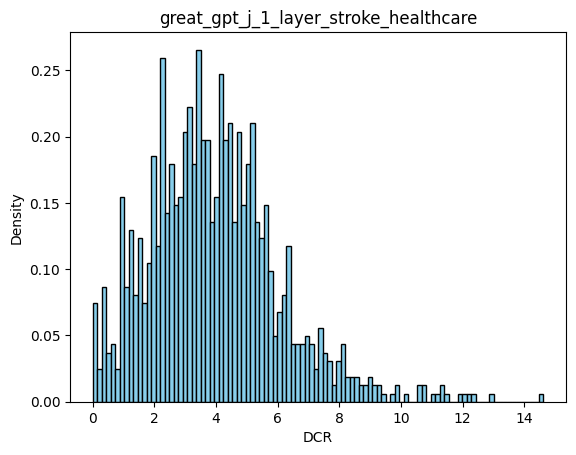

great_gpt_neox_1_layer_stroke_healthcare


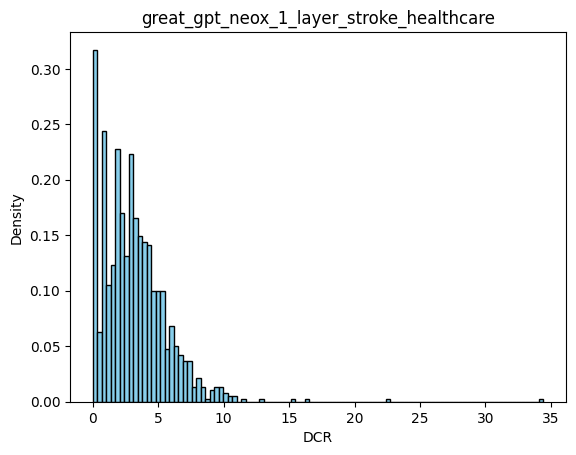

great_gpt_neo_2_layer_stroke_healthcare


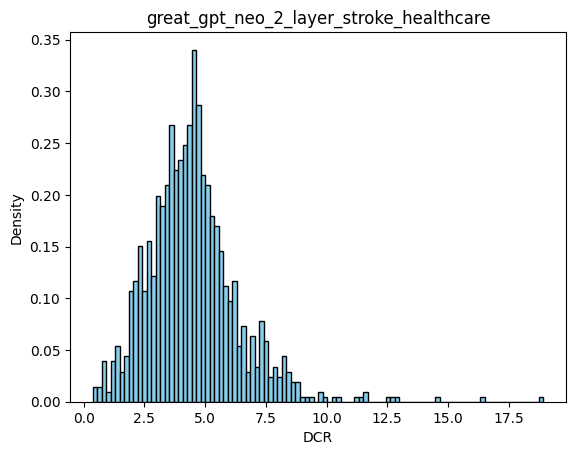

great_gpt_neo_4_layer_stroke_healthcare


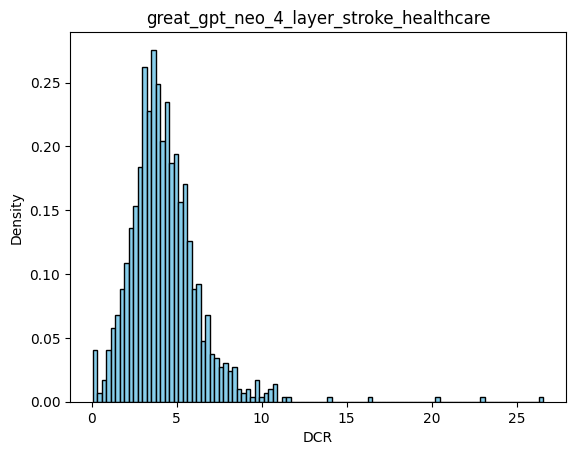

great_gpt_neo_6_layer_stroke_healthcare


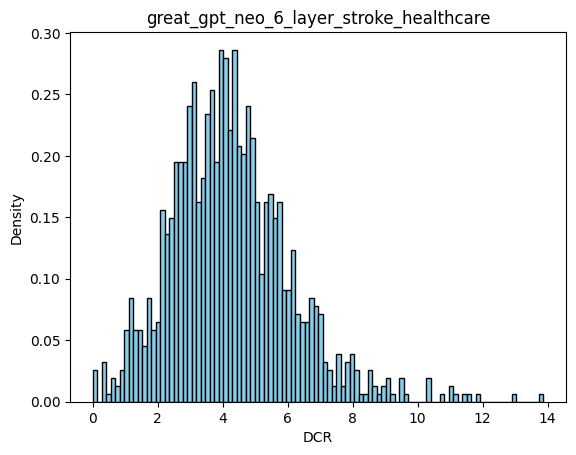

great_gpt_neo_8_layer_stroke_healthcare


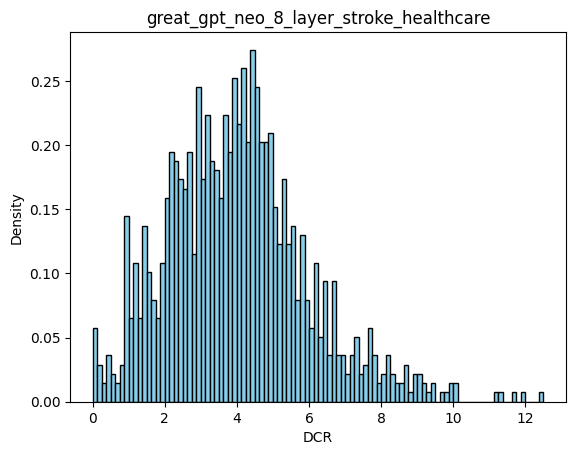

great_llama_1_layer_stroke_healthcare


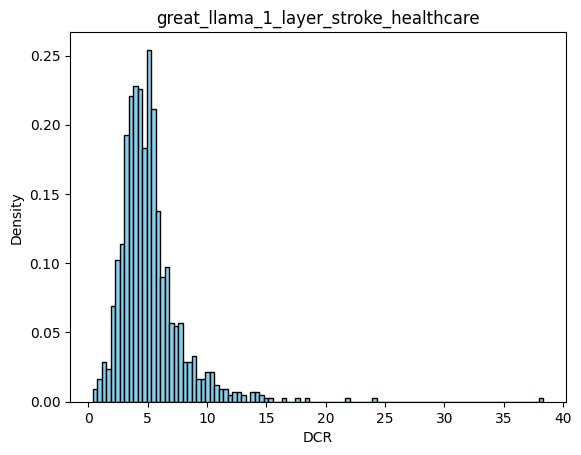

great_llama_2_layer_stroke_healthcare


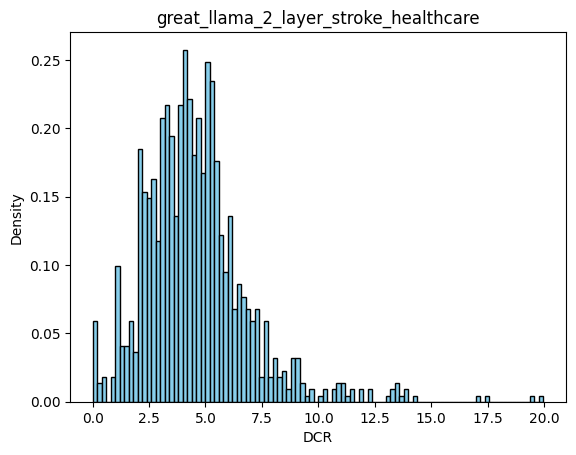

realtab_gpt2_12_layer_stroke_healthcare


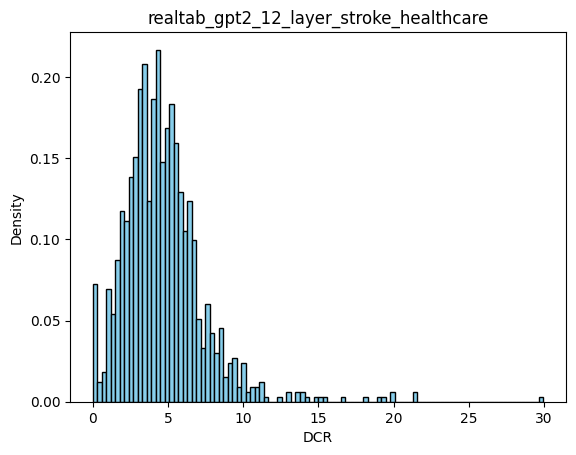

realtab_gpt2_6_layer_stroke_healthcare


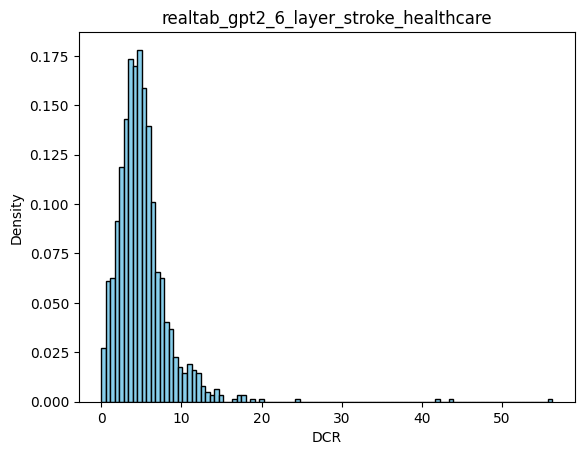

realtab_gpt_bigcode_12_layer_stroke_healthcare


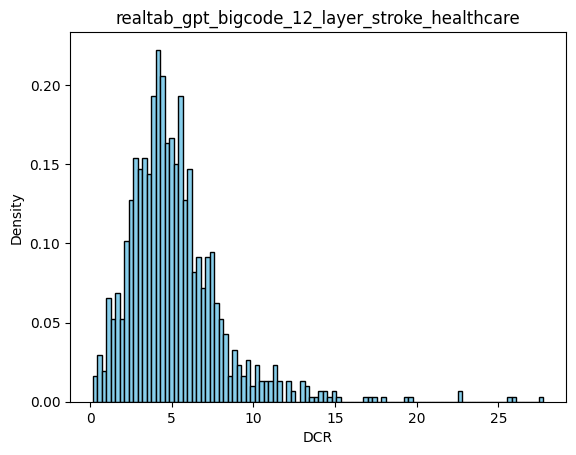

realtab_gpt_bigcode_6_layer_stroke_healthcare


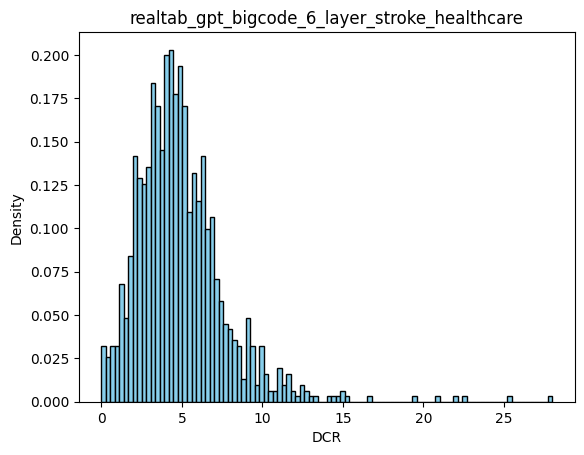

realtab_gpt_j_1_layer_stroke_healthcare


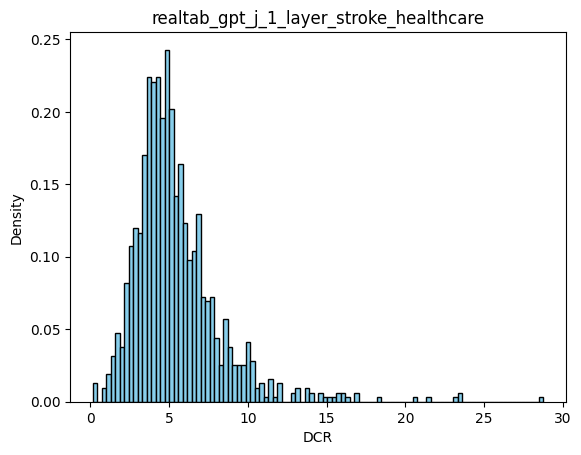

realtab_gpt_neox_1_layer_stroke_healthcare


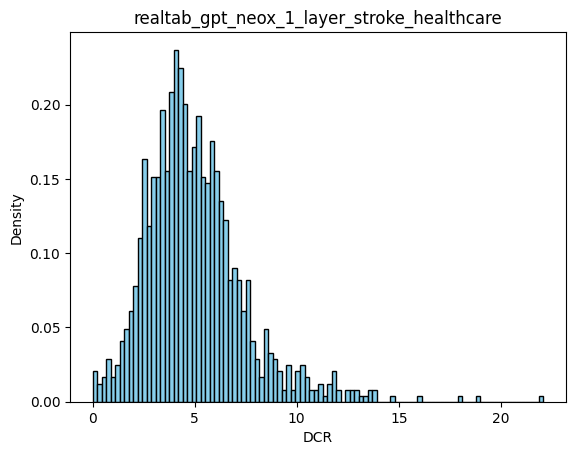

realtab_gpt_neo_2_layer_stroke_healthcare


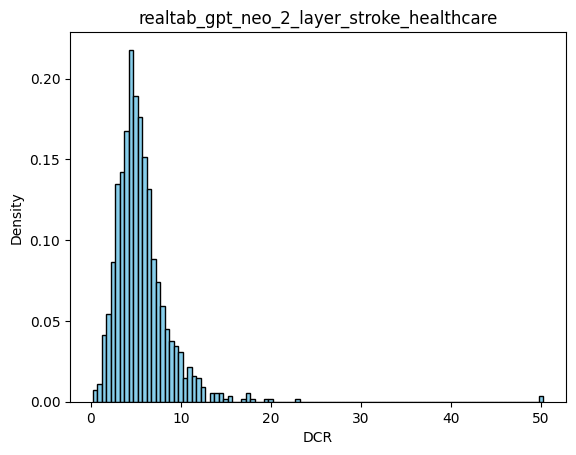

realtab_gpt_neo_4_layer_stroke_healthcare


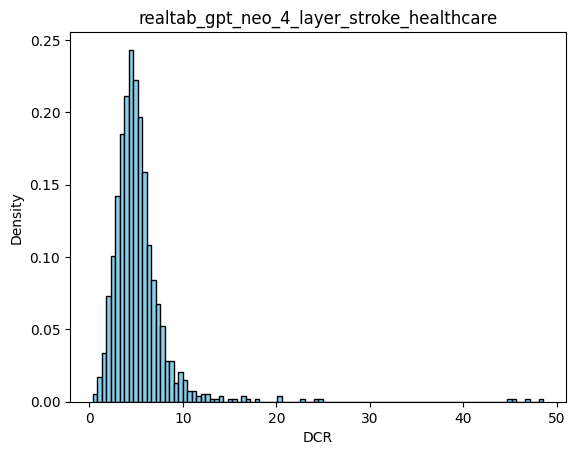

realtab_gpt_neo_6_layer_stroke_healthcare


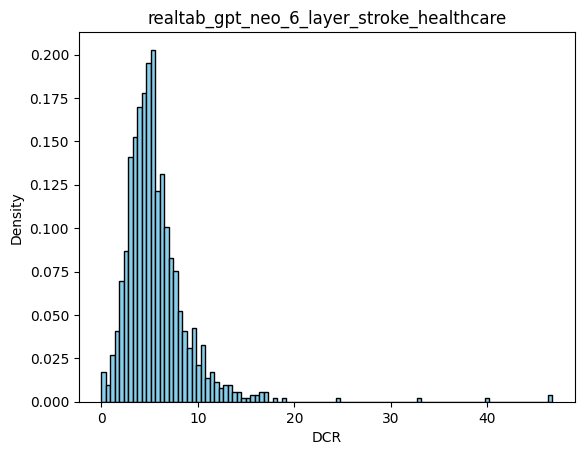

realtab_gpt_neo_8_layer_stroke_healthcare


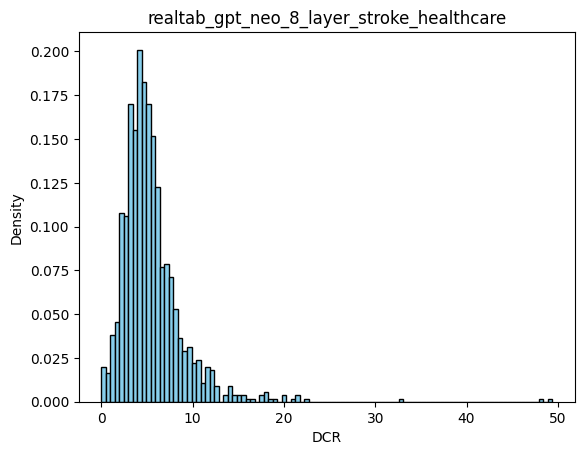

realtab_llama_1_layer_stroke_healthcare


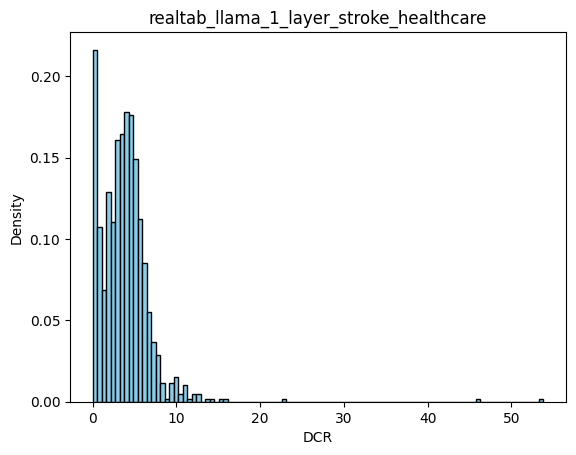

realtab_llama_2_layer_stroke_healthcare


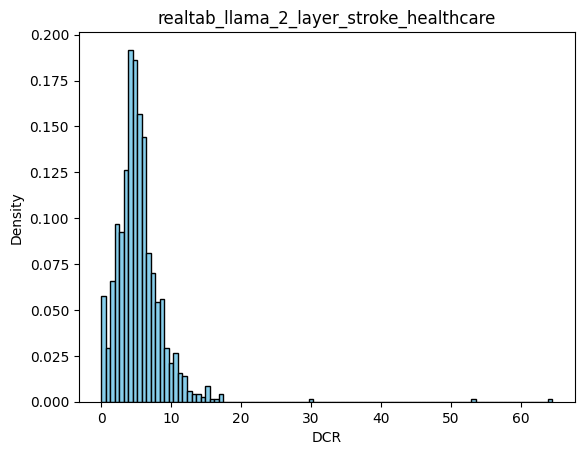

In [3]:
path_to_synthetic_dataset = "stroke_healthcare"

dcr_stroke_healthcare(org_train_df=org_train_df, org_test_df=org_test_df, path_to_synthetic_dataset=path_to_synthetic_dataset)

In [ ]:
def compute_dcr(synthetic_data, original_data):
    """
    Compute the Distance to Closest Record (DCR) for each synthetic sample.
    
    Parameters:
    - synthetic_data: array-like, shape (n_samples, n_features), synthetic samples
    - original_data: array-like, shape (m_samples, n_features), original samples
    
    Returns:
    - dcr_scores: array of minimum distances for each synthetic sample
    """
    # Compute L1 distance between each synthetic record and all original records
    distances = cdist(synthetic_data, original_data, metric='cityblock')
    
    # Get the minimum distance to closest original record for each synthetic record
    dcr_scores = distances.min(axis=1)
    
    return dcr_scores

In [ ]:
le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_work_type = LabelEncoder()
le_residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()

column_name = "gender"
org_train_df[column_name] = le_gender.fit_transform(org_train_df[column_name])
org_test_df[column_name] = le_gender.transform(org_test_df[column_name])

column_name = "ever_married"
org_train_df[column_name] = le_ever_married.fit_transform(org_train_df[column_name])
org_test_df[column_name] = le_ever_married.transform(org_test_df[column_name])

column_name = "work_type"
org_train_df[column_name] = le_work_type.fit_transform(org_train_df[column_name])
org_test_df[column_name] = le_work_type.transform(org_test_df[column_name])

column_name = "Residence_type"
org_train_df[column_name] = le_residence_type.fit_transform(org_train_df[column_name])
org_test_df[column_name] = le_residence_type.transform(org_test_df[column_name])

column_name = "smoking_status"
org_train_df[column_name] = le_smoking_status.fit_transform(org_train_df[column_name])
org_test_df[column_name] = le_smoking_status.transform(org_test_df[column_name])


In [ ]:
temp = compute_dcr(org_test_df, org_train_df)

In [ ]:
len(temp)

1108

In [ ]:
pd.DataFrame(temp).describe()

,0
count,1108.000000
mean,6.067482
std,3.099896
min,0.560000
25%,4.080000
50%,5.430000
75%,7.165000
max,29.200000


In [ ]:
np.quantile(temp, [0.25, 0.5, 0.99])

array([ 4.08  ,  5.43  , 16.5972])

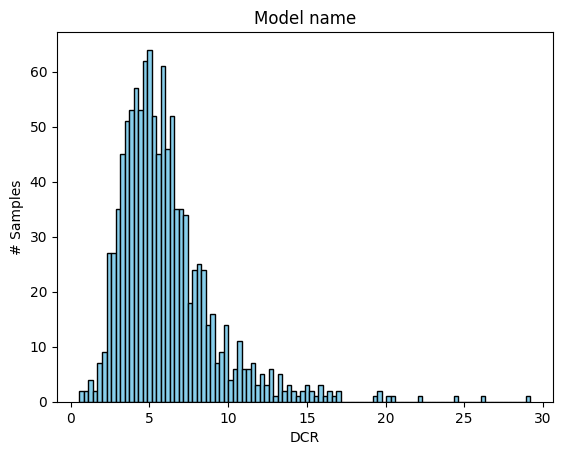

In [ ]:
filtered_scores = temp[temp < 5000]  # Adjust threshold as needed
plt.hist(filtered_scores, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('DCR')
plt.ylabel('# Samples')
plt.title('Model name')
plt.show()